# Exploring genotyping samples 

This note aims to make a first visualization of the genomic data of the samples

In [8]:
cd ..

/Users/arnau/Documents/isglobal/codes


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from genomics_modules import barcodes as bc
from genomics_modules import stats, plotting, utils
import datetime
import pdb

### Setting file names, paths and parameters 

In [10]:
data_path = '/Users/arnau/Documents/isglobal/genomics/data/'
file_name = data_path + 'Genotyping_results_March2020_1234-PF-MZ-MAYOR.xlsx'

### Loading data frame from excel file 

In [11]:
grc = pd.read_excel(file_name)
grc2 = pd.read_excel(file_name, sheet_name = 1)
barcodes = pd.read_excel(file_name, sheet_name = 2)

In [5]:
grc.head()

Sample Internal ID Sample External ID Date of Collection   Location  \
0           SPT52539          AA0055510         2017-03-07  Montepuez   
1           SPT52535          AA0055506         2015-11-23     Magude   
2           SPT52536          AA0055507         2015-11-23     Magude   
3           SPT52538          AA0055509         2017-03-07  Montepuez   
4           SPT52537          AA0055508         2017-03-07  Montepuez   

      Country             Study Species COIL McCOIL  \
0  Mozambique  1234-PF-MZ-MAYOR      Pf    1      1   
1  Mozambique  1234-PF-MZ-MAYOR       -    -      -   
2  Mozambique  1234-PF-MZ-MAYOR       -    -      -   
3  Mozambique  1234-PF-MZ-MAYOR      Pf    1      1   
4  Mozambique  1234-PF-MZ-MAYOR      Pf    1      1   

                                             Barcode Kelch P23:BP  PfCRT  \
0  AGTTAXTGCAGACCCGCGTAXGGGATGGCTTGTCTCATCXCATTTA...    WT      -  CVMNK   
1                                                  -     -      -      -   
2                                                  -     -      -      -   
3  AGTTAXTGCGAGTGTGTATCAGGGGTGGCTTGTCACATCGCACTTA...    WT      -  CVMNK   
4  GGTTAATGCAAGCGTGCATCXTGAGTACCCTGCTATATTGCTCTTA...    WT      -  CVMNK   

  PfDHFR PfDHPS PfEXO PfMDR1       PGB  
0   IRNI  SGEAA     E    NYD  VDDNIT\n  
1      -      -     -      -       -\n  
2      -      -     -      -       -\n  
3   IRNI  SGEAA     E    NYD  VDDNIT\n  
4   IRNI  AAKAA     E    NFD  VDDNIT\n

### Basic numbers of the data  

In [5]:
valids = bc.barcodes_are_valid(grc['Barcode'])
failed = np.array([i == '-' for i in grc['Barcode']], dtype=bool)
monoclonal = bc.barcodes_are_monoclonal(grc['Barcode'])
polyclonal = bc.barcodes_are_polyclonal(grc['Barcode'])

print("Number of samples: " + str(len(grc['Barcode'])))
print("Number of bases in barcodes: " + str(len(grc['Barcode'][0])))
print("Number of failed barcodes: " + str(np.sum(failed)))
print("Number of valid barcodes: " + str(np.sum(valids)))
print("Number of unique barcodes: " + str(len(grc['Barcode'][valids].unique())))
print("Number of monoclonal barcodes: " + str(np.sum(monoclonal)))
print("Number of polyclonal barcodes: " + str(np.sum(polyclonal)))
print("Number of unique monoclonal barcodes: " + str(len(grc['Barcode'][monoclonal].unique())))
print("Number of unique polyclonal barcodes: " + str(len(grc['Barcode'][polyclonal].unique())))

Number of samples: 1445
Number of bases in barcodes: 101
Number of failed barcodes: 613
Number of valid barcodes: 832
Number of unique barcodes: 825
Number of monoclonal barcodes: 257
Number of polyclonal barcodes: 575
Number of unique monoclonal barcodes: 251
Number of unique polyclonal barcodes: 574


### Statistics on polyclonal samples

In [139]:
count_n = np.array([bar.count('N') for bar in grc['Barcode'][polyclonal]])
count_x_poly = np.array([bar.count('X') for bar in grc['Barcode'][polyclonal]])

count_x_mono = np.array([bar.count('X') for bar in grc['Barcode'][monoclonal]])

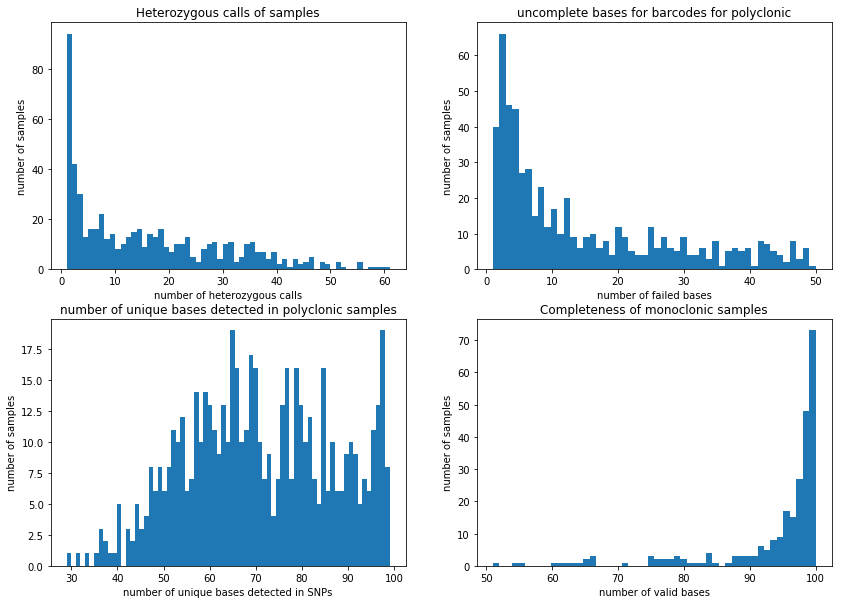

In [150]:
plt.figure(figsize=[14,10])
plt.subplot(221)
plt.hist(count_n, 60)
plt.title('Heterozygous calls of samples')
plt.xlabel('number of heterozygous calls')
plt.ylabel('number of samples')
#plt.show()

plt.subplot(222)
plt.hist(count_x_poly, 50)
plt.title('uncomplete bases for barcodes for polyclonic')
plt.xlabel('number of failed bases')
plt.ylabel('number of samples')
#plt.show()

plt.subplot(223)
plt.hist(101 - count_x_poly - count_n, 71)
plt.title('number of unique bases detected in polyclonic samples')
plt.xlabel('number of unique bases detected in SNPs')
plt.ylabel('number of samples')
#plt.show()

plt.subplot(224)
plt.hist(101 - count_x_mono, 50)
plt.title('Completeness of monoclonic samples')
plt.xlabel('number of valid bases')
plt.ylabel('number of samples')
plt.show()

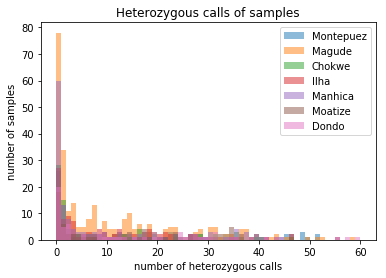

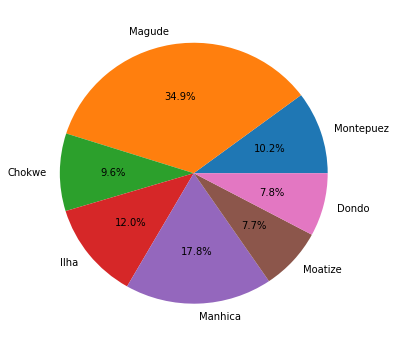

In [118]:
locs = []
counts = []
for loc in grc['Location'].unique():
    locs.append(loc)
    counts.append(np.sum(valids*(grc['Location'] == loc)))
    count_n = np.array([bar.count('N') for bar in grc['Barcode'][valids*(grc['Location'] == loc)]])
    plt.hist(count_n, 60, range = [0,60], label = loc, alpha = .5)
plt.title('Heterozygous calls of samples')
plt.xlabel('number of heterozygous calls')
plt.ylabel('number of samples')
plt.legend()
plt.show()

plt.figure(figsize=[6,6])
plt.pie(counts, labels = locs, autopct='%1.1f%%')
plt.show()

In [12]:
grc['Date']= pd.to_datetime(grc['Date of Collection'])

/Users/arnau/env/genomics/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


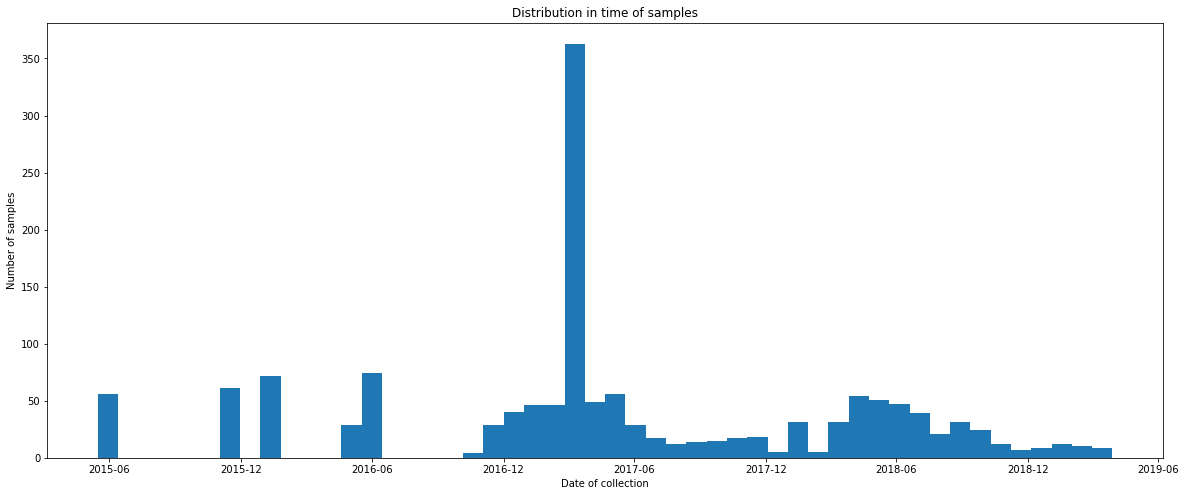

In [13]:
plt.figure(figsize= [20,8] )
plt.hist(grc['Date'],50)
plt.title('Distribution in time of samples')
plt.xlabel('Date of collection')
plt.ylabel('Number of samples')
plt.show()

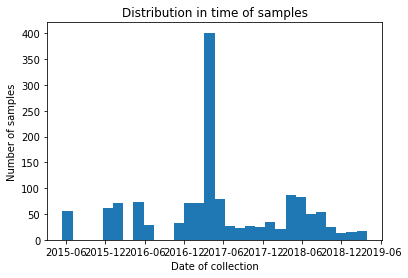

In [137]:
plt.hist(grc['Date'],30)
plt.title('Distribution in time of samples')
plt.xlabel('Date of collection')
plt.ylabel('Number of samples')
plt.show()

### Plotting the SNP relatedness (fraction of common bases) between samples 

In [152]:
diff_matrix = bc.relatedness_matrix(grc['Barcode'][valids].tolist())

In this figure I compare the barcodes between all the samples, representing in colour the fraction of common bases (from 0 for no common bases to 1 for identical barcodes). So, the pixel position (i,j) shows the fraction of common bases between the objects i and j (so the image is symmetric).  

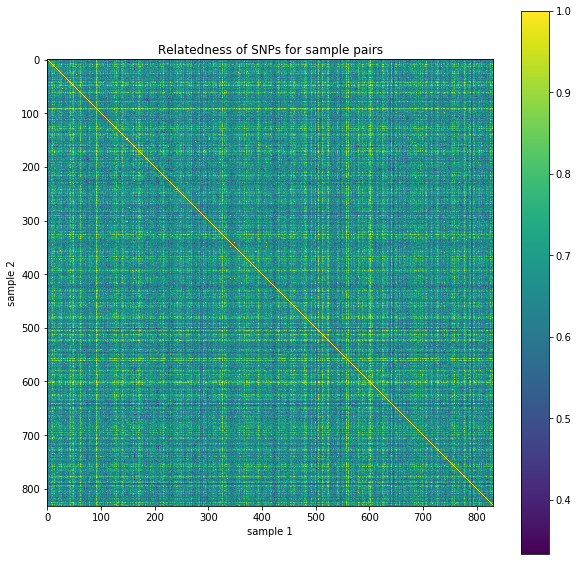

In [17]:
plt.figure(figsize=[10,10])
plt.imshow(diff_matrix)
plt.colorbar()
plt.ylabel('sample 2')
plt.xlabel('sample 1')
plt.title("Relatedness of SNPs for sample pairs")
plt.show()

In [153]:
diff_matrix_mono = bc.relatedness_matrix(grc['Barcode'][monoclonal].tolist())

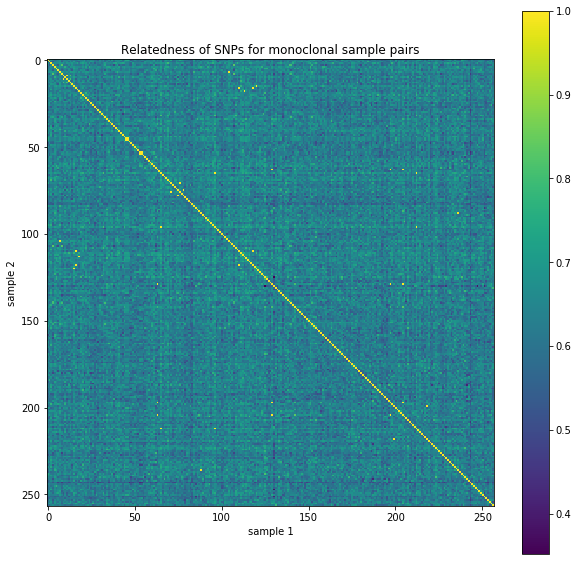

In [18]:
plt.figure(figsize=[10,10])
plt.imshow(diff_matrix_mono)
plt.colorbar()
plt.ylabel('sample 2')
plt.xlabel('sample 1')
plt.title("Relatedness of SNPs for monoclonal sample pairs")
plt.show()

In [154]:
diff_matrix_poly = bc.relatedness_matrix(grc['Barcode'][polyclonal].tolist())

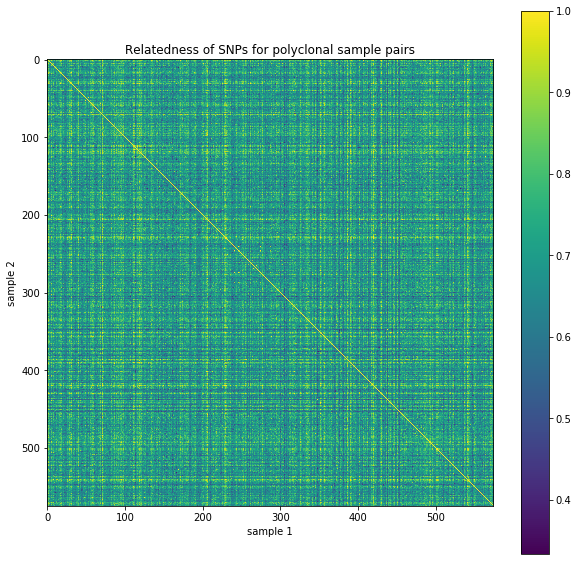

In [19]:
plt.figure(figsize=[10,10])
plt.imshow(diff_matrix_poly)
plt.colorbar()
plt.ylabel('sample 2')
plt.xlabel('sample 1')
plt.title("Relatedness of SNPs for polyclonal sample pairs")
plt.show()

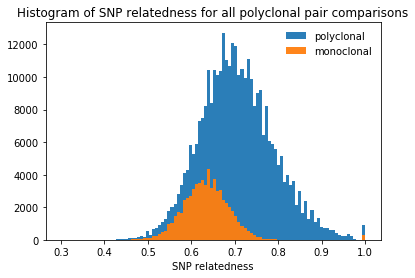

In [24]:
plt.hist(diff_matrix_poly.reshape(np.prod(diff_matrix_poly.shape)),100, range = [.3,1.], alpha = .95, label = 'polyclonal')
plt.hist(diff_matrix_mono.reshape(np.prod(diff_matrix_mono.shape)),100, range = [.3,1.], alpha = .95, label = 'monoclonal')
plt.title('Histogram of SNP relatedness for all polyclonal pair comparisons')
plt.xlabel('SNP relatedness')
plt.legend(frameon = False)
plt.show()

Here I focus only on the barcodes that have at least another barcode with more than 97% common bases. The idea is to identify populations with very similar genotype (yellow populations in the next figure). 

In [158]:
#Finding and selecting objects with similar barcodes
similarity_threshold = .97
wi, wj = np.where(diff_matrix>similarity_threshold)
non_diagonal = wi!=wj
sim_cases = np.unique(wi[non_diagonal])

#Define the matrix for only those objects
diff_matrix_sim = np.zeros((len(sim_cases), len(sim_cases)))
for i in range(len(sim_cases)):
    for j in range(len(sim_cases)):
        diff_matrix_sim[i,j] = diff_matrix[sim_cases[i],sim_cases[j]]

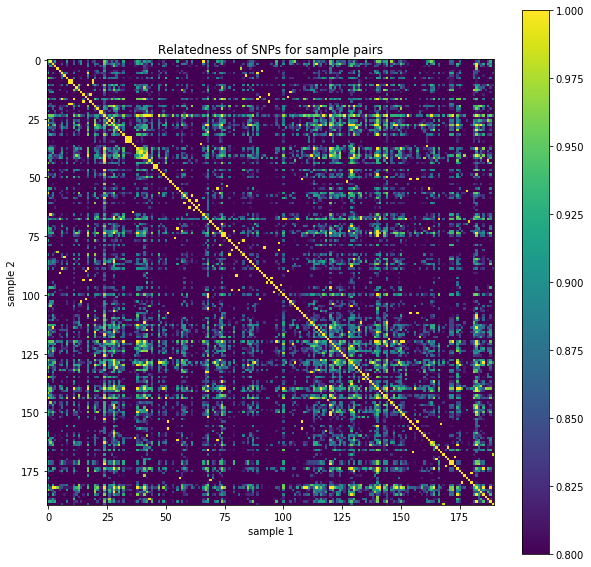

Number of pairs with relatedness > 0.97: 134.0 out of 17860.0


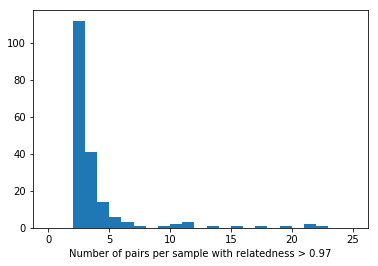

In [159]:
plt.figure(figsize=[10,10])
plt.imshow(diff_matrix_sim, vmin = .8)
plt.colorbar()
plt.ylabel('sample 2')
plt.xlabel('sample 1')
plt.title("Relatedness of SNPs for sample pairs")
plt.show()

num_pairs = np.sum(diff_matrix_sim>similarity_threshold)/2. - len(diff_matrix_sim)
total_pairs = np.prod(diff_matrix_sim.shape)/2. - len(diff_matrix_sim)
print("Number of pairs with relatedness > " + str(similarity_threshold) + ": " + str(num_pairs) + ' out of ' + str(total_pairs))

#Notice here that the diagonal terms are represented, and non-diagonal terms are represented twice
plt.hist([np.sum(i>similarity_threshold) for i in diff_matrix_sim], 25, range = [0,25])
plt.xlabel('Number of pairs per sample with relatedness > ' + str(similarity_threshold))
plt.show()


In [160]:
#Finding and selecting objects with similar barcodes
similarity_threshold = .97
wi, wj = np.where(diff_matrix_mono>similarity_threshold)
non_diagonal = wi!=wj
sim_cases = np.unique(wi[non_diagonal])

#Define the matrix for only those objects
diff_matrix_sim = np.zeros((len(sim_cases), len(sim_cases)))
for i in range(len(sim_cases)):
    for j in range(len(sim_cases)):
        diff_matrix_sim[i,j] = diff_matrix_mono[sim_cases[i],sim_cases[j]]

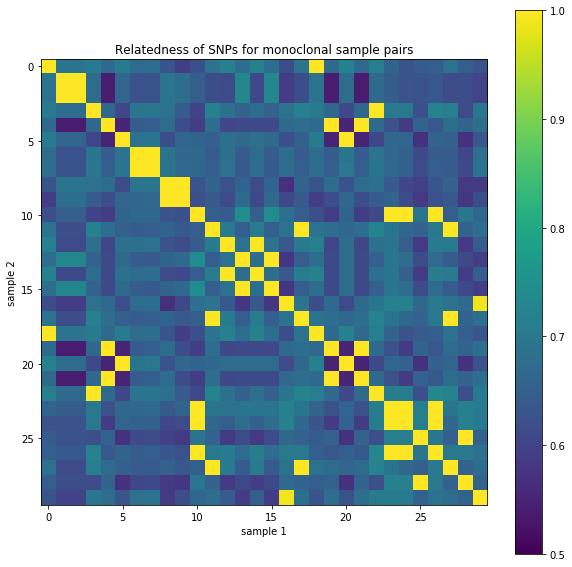

Number of pairs with relatedness > 0.97: 7.0 out of 420.0


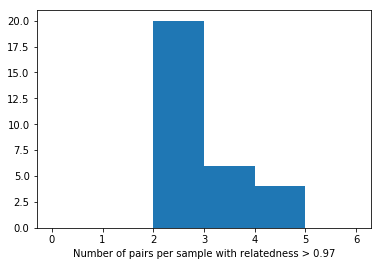

In [161]:
plt.figure(figsize=[10,10])
plt.imshow(diff_matrix_sim, vmin = .5)
plt.colorbar()
plt.ylabel('sample 2')
plt.xlabel('sample 1')
plt.title("Relatedness of SNPs for monoclonal sample pairs")
plt.show()

num_pairs = np.sum(diff_matrix_sim>similarity_threshold)/2. - len(diff_matrix_sim)
total_pairs = np.prod(diff_matrix_sim.shape)/2. - len(diff_matrix_sim)
print("Number of pairs with relatedness > " + str(similarity_threshold) + ": " + str(num_pairs) + ' out of ' + str(total_pairs))

#Notice here that the diagonal terms are represented, and non-diagonal terms are represented twice
plt.hist([np.sum(i>similarity_threshold) for i in diff_matrix_sim], 6, range = [0,6])
plt.xlabel('Number of pairs per sample with relatedness > ' + str(similarity_threshold))
plt.show()


In [162]:
#Finding and selecting objects with similar barcodes
similarity_threshold = .97
wi, wj = np.where(diff_matrix_poly>similarity_threshold)
non_diagonal = wi!=wj
sim_cases = np.unique(wi[non_diagonal])

#Define the matrix for only those objects
diff_matrix_sim = np.zeros((len(sim_cases), len(sim_cases)))
for i in range(len(sim_cases)):
    for j in range(len(sim_cases)):
        diff_matrix_sim[i,j] = diff_matrix_poly[sim_cases[i],sim_cases[j]]

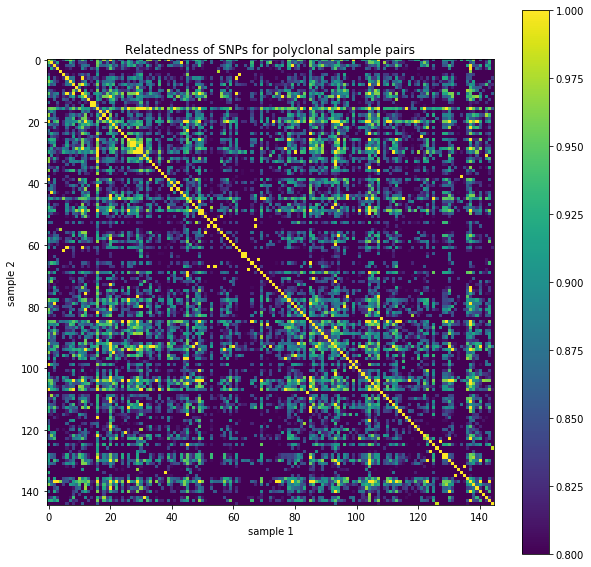

Number of pairs with relatedness > 0.97: 121.5 out of 10367.5


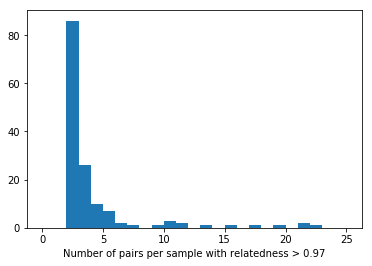

In [163]:
plt.figure(figsize=[10,10])
plt.imshow(diff_matrix_sim, vmin = .8)
plt.colorbar()
plt.ylabel('sample 2')
plt.xlabel('sample 1')
plt.title("Relatedness of SNPs for polyclonal sample pairs")
plt.show()

num_pairs = np.sum(diff_matrix_sim>similarity_threshold)/2. - len(diff_matrix_sim)
total_pairs = np.prod(diff_matrix_sim.shape)/2. - len(diff_matrix_sim)
print("Number of pairs with relatedness > " + str(similarity_threshold) + ": " + str(num_pairs) + ' out of ' + str(total_pairs))

#Notice here that the diagonal terms are represented, and non-diagonal terms are represented twice
plt.hist([np.sum(i>similarity_threshold) for i in diff_matrix_sim], 25, range = [0,25])
plt.xlabel('Number of pairs per sample with relatedness > ' + str(similarity_threshold))
plt.show()


In order to check whether these similar pairs come from a few large populations that are similar or from many pairs that are different between them, here I show the histogram of how many similar pairs each sample has. We can see that most of the samples only have a few other similar samples, and there are no large groups of common samples (for this we would see n objects with n similar pairs, with a large n).

### Plotting bases for samples

In [8]:
#color code of bases
base2color = {
    'A' : 'tab:blue',
    'C' : 'tab:orange',
    'G' : 'tab:green',
    'T' : 'tab:red',
    'X' : 'w',
    'N' : 'tab:gray',
    '-' : 'w',
    'm' : 'lightgray'
}

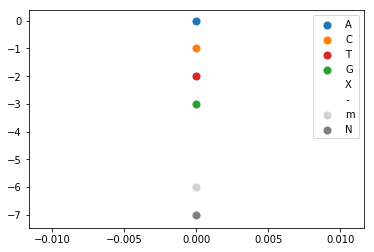

In [54]:
plotting.plot_legend(base2color)

This Figure shows the bases of the 50 first samples. The colours represent the different bases as specifies just above.  

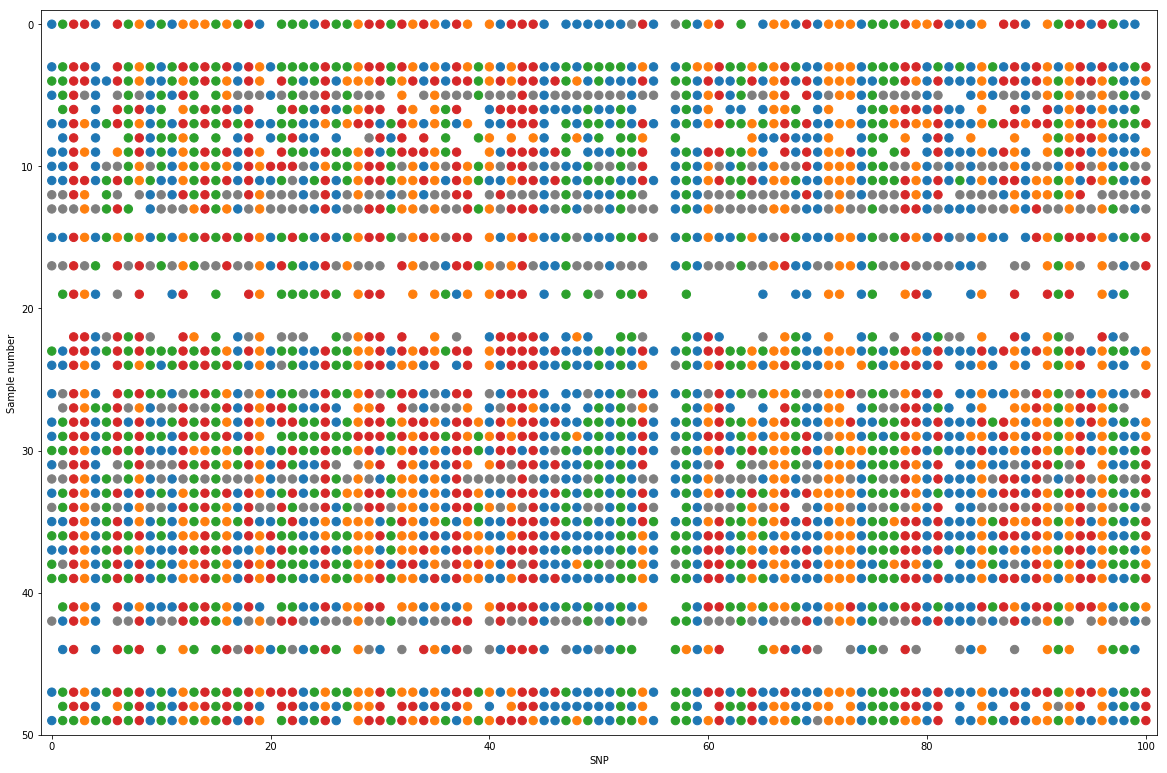

In [55]:
plotting.plot_barcodes(grc['Barcode'][:50].tolist(), base2color)


Here we only identify the SNP positions of the failed (X, in grey) and heterozygous (N, in green) cases

In [62]:
#color code of bases
base2NX = {
    'A' : 'w',
    'C' : 'w',
    'G' : 'w',
    'T' : 'w',
    'X' : 'tab:gray',
    'N' : 'tab:green',
    '-' : 'w',
    'm' : 'w'
}

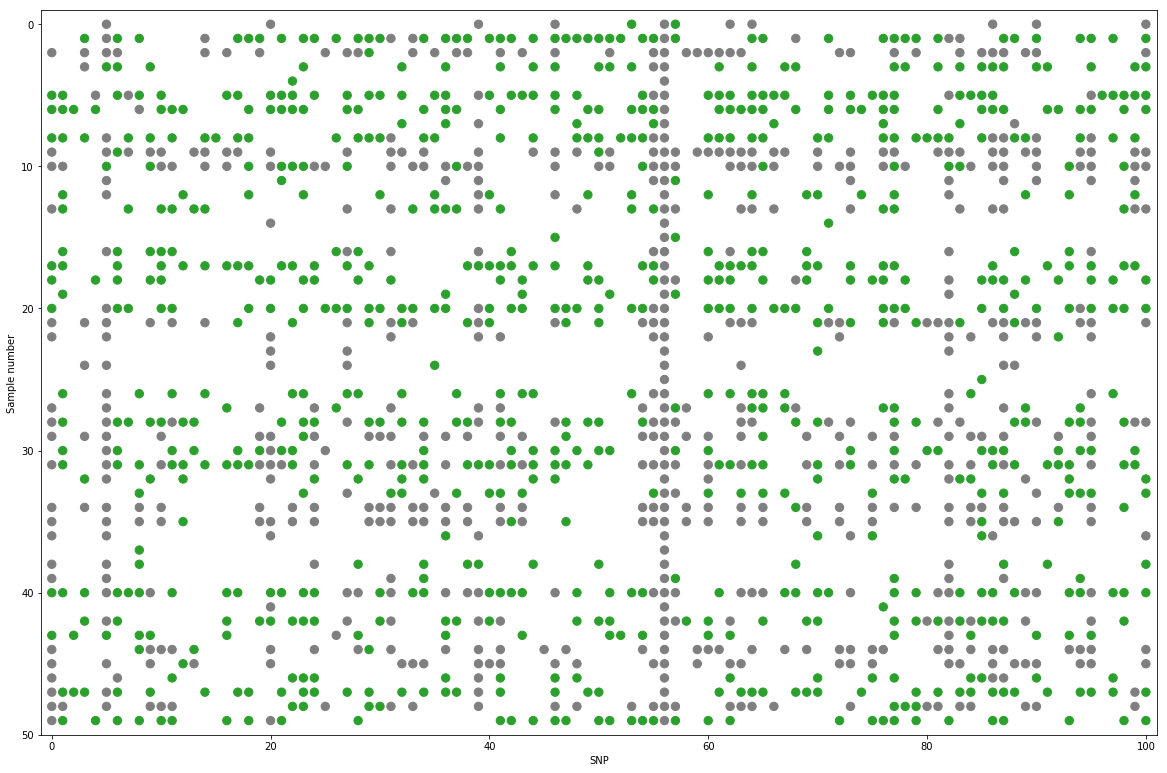

In [63]:
plotting.plot_barcodes(grc['Barcode'][polyclonal][:50].tolist(), base2NX)


### Plotting differences in bases with respect to a reference

Here we have taken the first barcode as reference and shown in the first horizontal line. Then, only differences with respect to this reference barcode are shown, marking in light grey the common bases.  

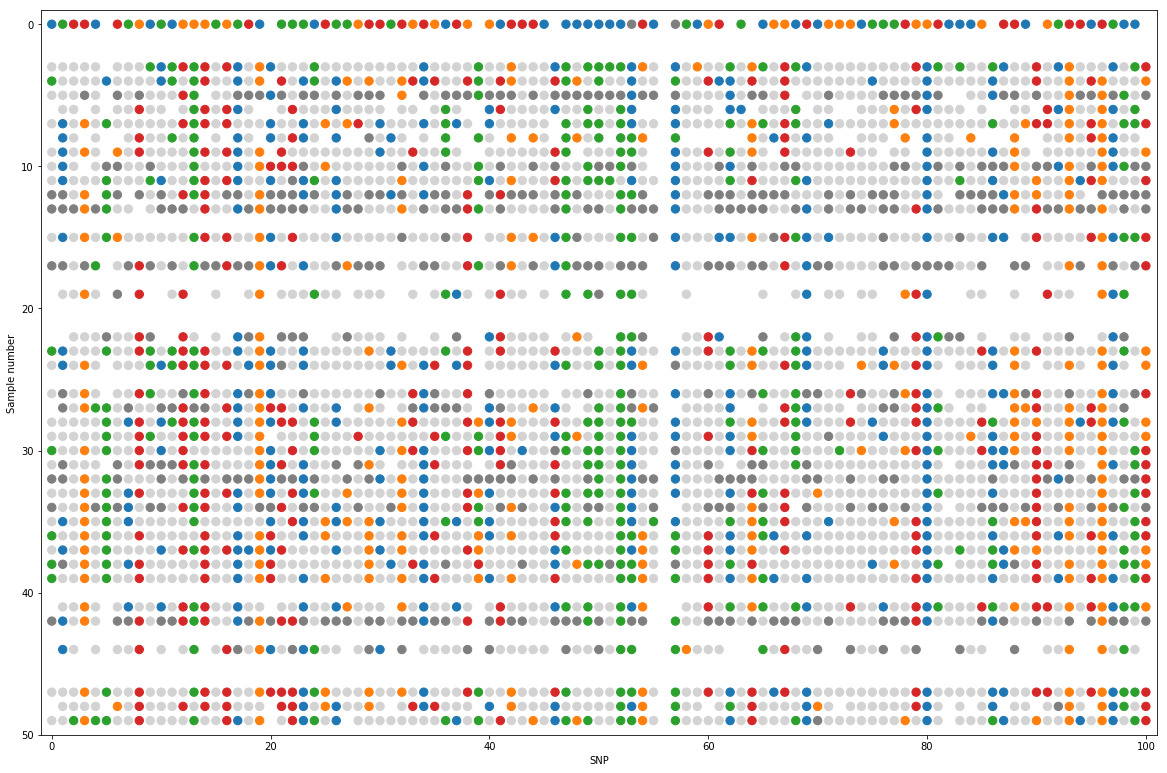

In [64]:
plotting.plot_bar_diff(grc['Barcode'][0], grc['Barcode'][1:50].tolist(), base2color, keep_X=True, keep_N=True)

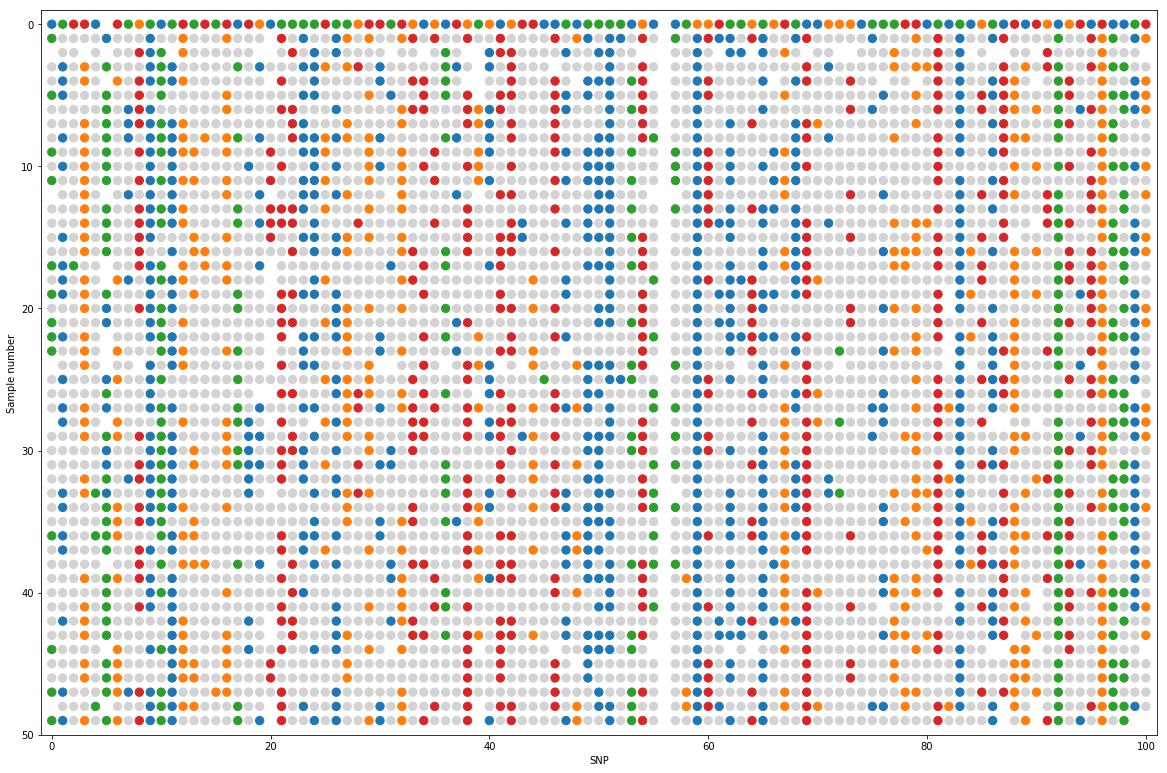

In [93]:
plotting.plot_bar_diff(grc['Barcode'][monoclonal].iloc[0], grc['Barcode'][monoclonal].iloc[1:50].tolist(), base2color, keep_X=True, keep_N=True)

# Biallelicness of barcodes

Here I find how many different bases can be found in each SNPs.  

In [9]:
monoclonal_bars = np.array([bc.barcode_list(bar) for bar in grc['Barcode'][monoclonal]])
unique_bases_mono = np.array([bc.count_unique_bases(monoclonal_bars[:,i]) for i in range(monoclonal_bars.shape[1])])
polyclonal_bars = np.array([bc.barcode_list(bar) for bar in grc['Barcode'][polyclonal]])
unique_bases_poly = np.array([bc.count_unique_bases(polyclonal_bars[:,i]) for i in range(polyclonal_bars.shape[1])])

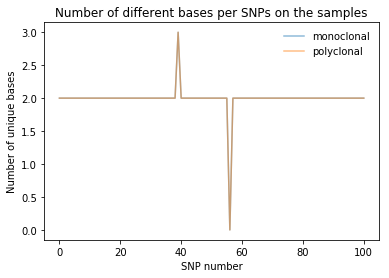

In [27]:
plt.plot(unique_bases_mono, alpha = .5, label = 'monoclonal')
plt.plot(unique_bases_poly, alpha = .5, label = 'polyclonal')
plt.title('Number of different bases per SNPs on the samples')
plt.xlabel('SNP number')
plt.ylabel('Number of unique bases')
plt.legend(frameon = False)
plt.show()

I found one SNP to have up to three bases for monoclonal and polyclonal samples. It corresponds to SNP 39

In [44]:
np.unique(monoclonal_bars[:,39]), np.unique(polyclonal_bars[:,39])

(array(['C', 'G', 'T', 'X'], dtype='|S1'),
 array(['C', 'G', 'N', 'T', 'X'], dtype='|S1'))

In [45]:
np.where(monoclonal_bars[:,39]=='T'), np.where(polyclonal_bars[:,39]=='T')

((array([172]),), (array([19]),))

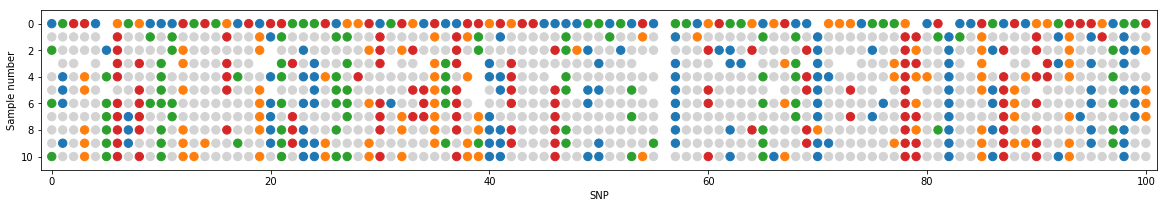

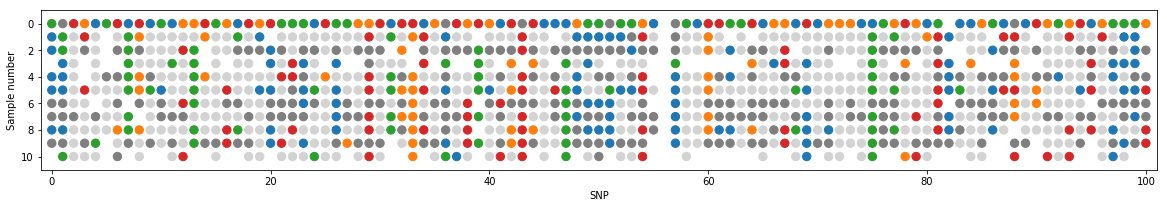

In [34]:
plotting.plot_bar_diff(grc['Barcode'][monoclonal].iloc[172], grc['Barcode'][monoclonal].iloc[:10].tolist(), base2color, keep_X=True, keep_N=True)
plotting.plot_bar_diff(grc['Barcode'][polyclonal].iloc[19], grc['Barcode'][polyclonal].iloc[:10].tolist(), base2color, keep_X=True, keep_N=True)

# PCA

In this section I test different approaches to compress the data through PCA and SVD analyses. Exploring potential relations between components and other data properties. 

In [59]:
#dictionary to translate bases to 4d vectors
base2vect = {
    'A' : [1.,0.,0.,0.],
    'C' : [0.,1.,0.,0.],
    'G' : [0.,0.,1.,0.],
    'T' : [0.,0.,0.,1.],
    'X' : [0.,0.,0.,0.],
    'N' : [0.,0.,0.,0.]
}

#dictionary to translate bases to numbers
base2num = {
    'A' : 1.,
    'C' : 2.,
    'G' : 3.,
    'T' : 4.,
    'X' : 0.,
    'N' : 0.
}

In [60]:
#vectors of all barcodes, defining bases with 4d vectors, so that all bases are orthogonal
barcode_vecs = bc.bars2vecs(grc['Barcode'][valids].tolist(), base2vect)
#another definition of vectors, specifying bases from 1 to 4
barcode_nums = bc.bars2vecs(grc['Barcode'][valids].tolist(), base2num)

I explore 4 different approaches for the analysis, from all the combination between these two steps:

- How to quantify the bases. To translate the bases into numbers I use two approaches. First, I represent the bases as a 4d vector, so that A = [1,0,0,0], C = [0,1,0,0], etc. With this I ensure the bases are orthogonal between them, non of them are numerically closer to one than to others. On the other hand, the dimensionality increases a factor of 4. The second approach, I represent the bases with numbers from 1 to 4. 

- To get the eigen vectors and the new representation of data, I can use either Principal Component Analysis or Singular Value Decomposition.


In [61]:
num_SNPs = len(grc['Barcode'][0])

x = barcode_vecs.reshape(len(barcode_vecs),num_SNPs,4)
y = barcode_vecs.reshape(len(barcode_vecs),num_SNPs,4)

cov = stats.vec_cov_mat(x, y, normed = True)


genomics_modules/stats.py:55: RuntimeWarning: invalid value encountered in double_scalars
  return cov_ij/np.sqrt(cov_ii*cov_jj)


Here I show the normalized covariance between the SNPs, so how well are the different SNPs correlated between them. We can see that many SNPs are strongly correlated or anticorrelated between them.  

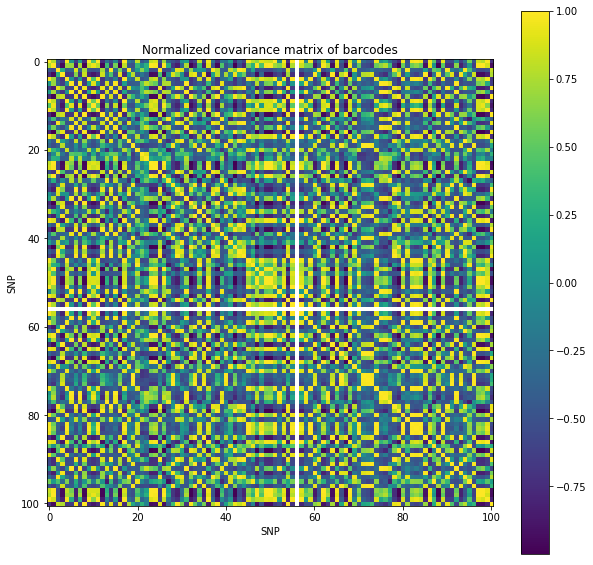

In [68]:
plt.figure(figsize=[10,10])
plt.imshow(cov)
plt.xlabel('SNP')
plt.ylabel('SNP')
plt.title('Normalized covariance matrix of barcodes')
plt.colorbar()

In [62]:
num_SNPs = len(grc['Barcode'][0])

x = barcode_vecs.reshape(len(barcode_vecs),num_SNPs,4)
y = barcode_vecs.reshape(len(barcode_vecs),num_SNPs,4)

cov_mono = stats.vec_cov_mat(x[monoclonal[valids]], y[monoclonal[valids]], normed = True)

x = barcode_vecs.reshape(len(barcode_vecs),num_SNPs,4)
y = barcode_vecs.reshape(len(barcode_vecs),num_SNPs,4)

cov_poly = stats.vec_cov_mat(x[polyclonal[valids]], y[polyclonal[valids]], normed = True)


Here I show the Covariance matrix of the SNPs splitting between the monoclonal and the polyclonal cases. It seems independent of this. 

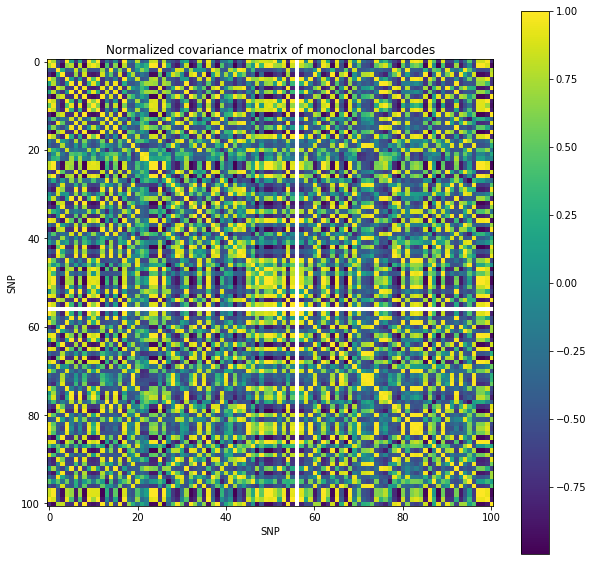

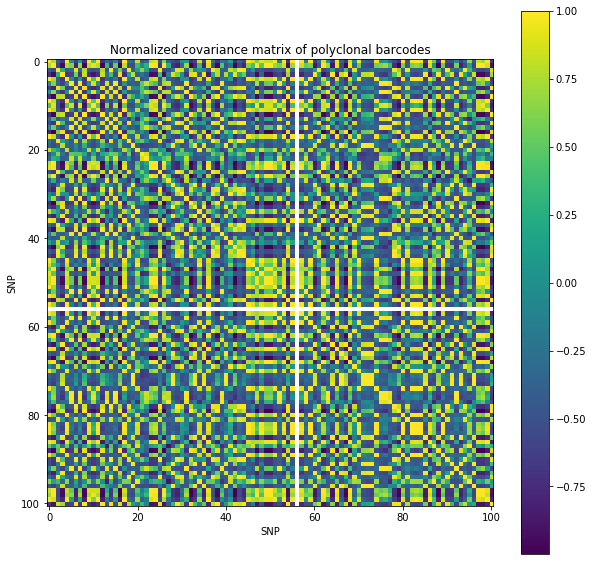

In [88]:
plt.figure(figsize=[10,10])
plt.imshow(cov_mono)
plt.xlabel('SNP')
plt.ylabel('SNP')
plt.title('Normalized covariance matrix of monoclonal barcodes')
plt.colorbar()

plt.figure(figsize=[10,10])
plt.imshow(cov_poly)
plt.xlabel('SNP')
plt.ylabel('SNP')
plt.title('Normalized covariance matrix of polyclonal barcodes')
plt.colorbar()

In [63]:
bar_vec_svd, Pv = stats.SVD(barcode_vecs)
bar_num_svd, Pn = stats.SVD(barcode_nums)

bar_vec_pca = np.real(stats.PCA(barcode_vecs))
bar_num_pca = np.real(stats.PCA(barcode_nums))

In [64]:
bar_num_svd_mono, Pn = stats.SVD(barcode_nums[monoclonal[valids]])
bar_num_pca_mono = np.real(stats.PCA(barcode_nums[monoclonal[valids]]))

bar_num_svd_poly, Pn = stats.SVD(barcode_nums[polyclonal[valids]])
bar_num_pca_poly = np.real(stats.PCA(barcode_nums[polyclonal[valids]]))

In [67]:
loc2col = {
    'Montepuez' : 'tab:blue', 
    'Magude' : 'tab:orange', 
    'Chokwe' : 'tab:green', 
    'Ilha' : 'tab:red', 
    'Manhica' : 'tab:purple',
    'Moatize' : 'tab:brown', 
    'Dondo' : 'tab:pink' 
}

sp2col = {
    'Pf' : 'tab:blue', 
    'Pm' : 'tab:orange', 
    'Pf/Pm' : 'tab:green', 
    'Pf/Po' : 'tab:red', 
    'Po' : 'tab:purple',
    'Pf/' : 'tab:brown', 
    'Pv' : 'tab:pink',
    'Pf/Pm/Po' : 'tab:gray',
    'Pf/Po/Pm' : 'tab:olive',
    '-' : 'k'
}

In [ ]:
plotting.plot_FS(bar_vec_svd, c = grc['Date'][valids], title = 'SVD with orth. vectors')
plotting.plot_FS(bar_num_svd, c = grc['Date'][valids], title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_vec_pca, c = grc['Date'][valids], title = 'PCA with orth. vectors')
plotting.plot_FS(bar_num_pca, c = grc['Date'][valids], title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_num_svd_mono, c = grc['Date'][monoclonal], title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_num_pca_mono, c = grc['Date'][monoclonal], title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_num_svd_poly, c = grc['Date'][polyclonal], title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_num_pca_poly, c = grc['Date'][polyclonal], title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_vec_svd, c = utils.dict_translate(grc['Location'][valids], loc2col), title = 'SVD with orth. vectors')
plotting.plot_FS(bar_num_svd, c = utils.dict_translate(grc['Location'][valids], loc2col), title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_vec_pca, c = utils.dict_translate(grc['Location'][valids], loc2col), title = 'PCA with orth. vectors')
plotting.plot_FS(bar_num_pca, c = utils.dict_translate(grc['Location'][valids], loc2col), title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_num_svd_mono, c = utils.dict_translate(grc['Location'][monoclonal], loc2col), title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_num_pca_mono, c = utils.dict_translate(grc['Location'][monoclonal], loc2col), title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_num_svd_poly, c = utils.dict_translate(grc['Location'][polyclonal], loc2col), title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_num_pca_poly, c = utils.dict_translate(grc['Location'][polyclonal], loc2col), title = 'PCA with 1-4 numbers')

 Here I explore the scatter distributions between the first 3 components of the PCA and SVD transformations. 
 I show 6 plots comparing them, and I repeat is for the 4 different SVD and PCA approaches I have described above. 
 
 The colour shows the values of COIL, showing some patterns with respect to some PCs.

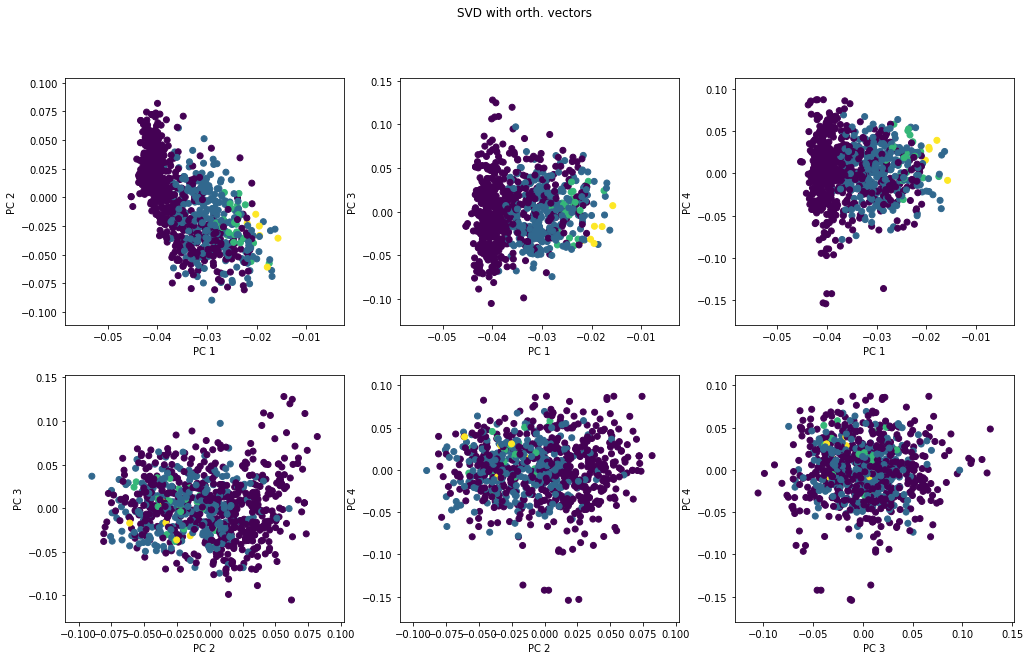

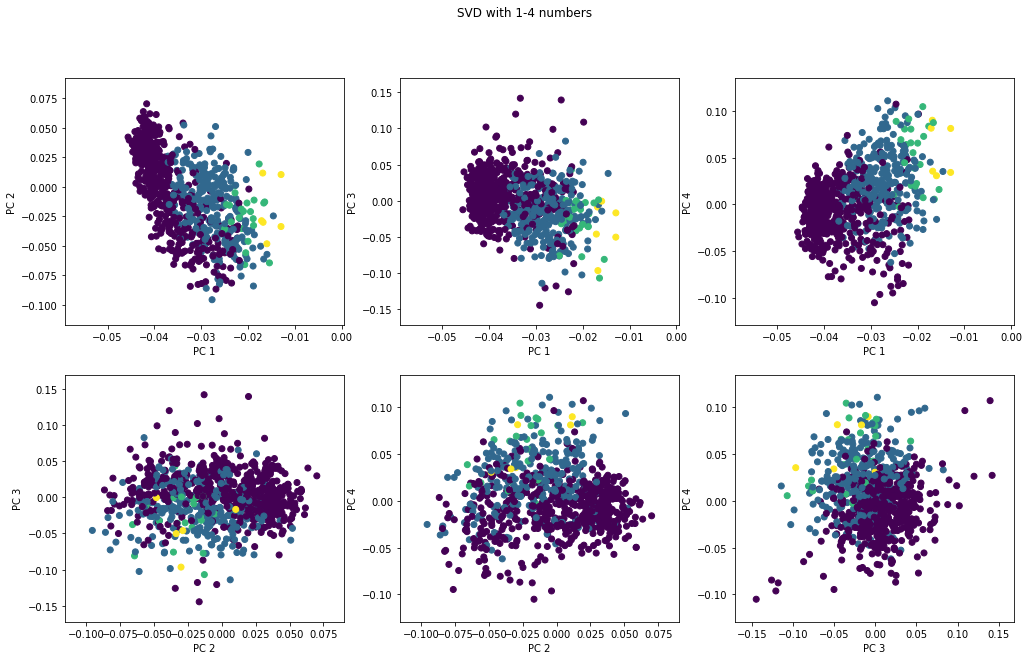

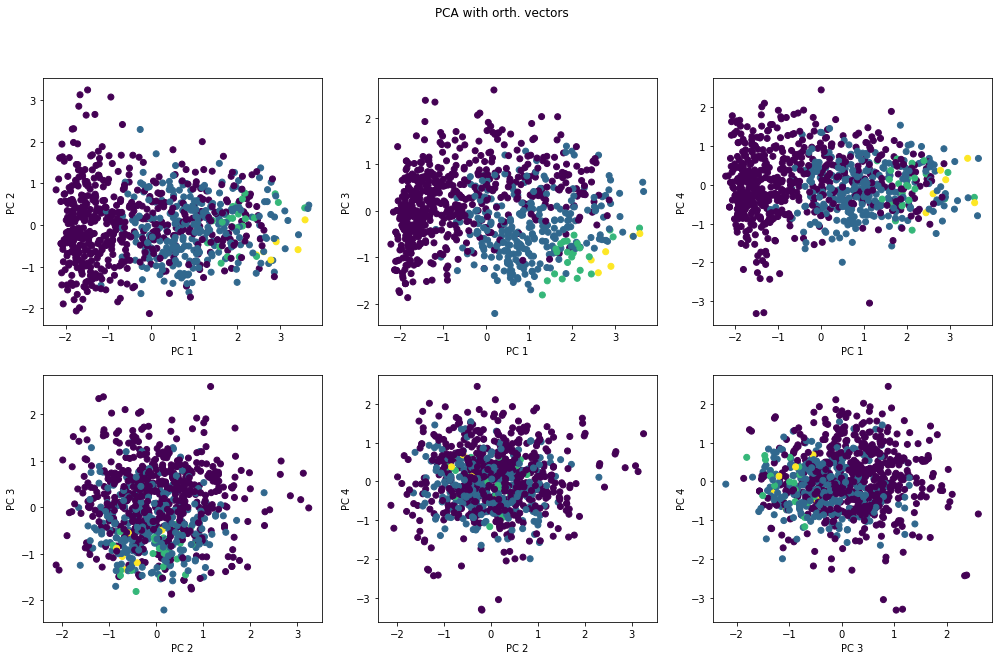

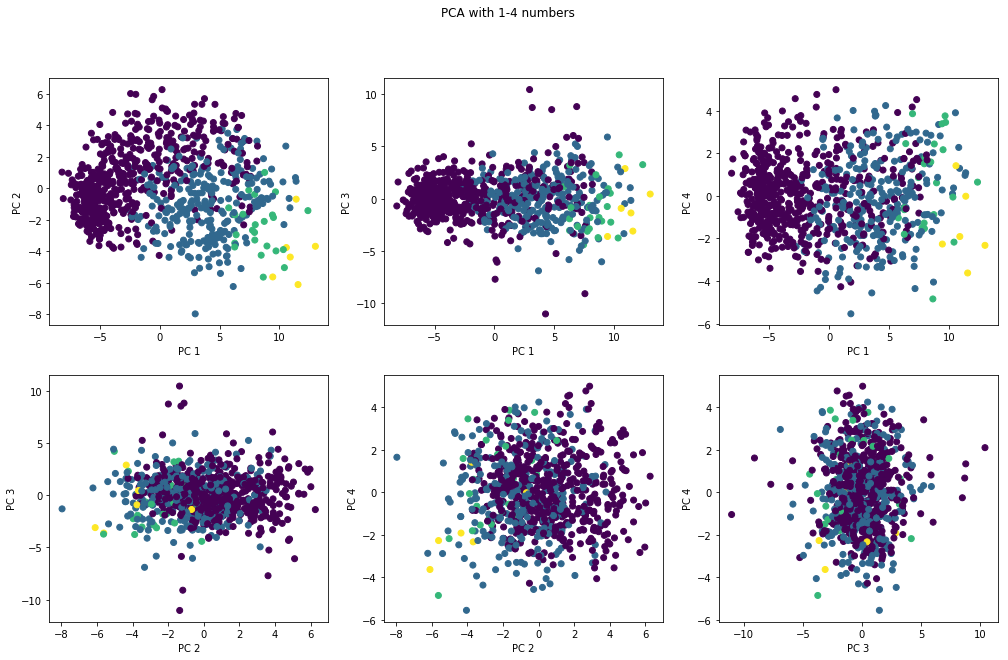

In [25]:
plotting.plot_FS(bar_vec_svd, c = grc['COIL'][valids].tolist(), title = 'SVD with orth. vectors')
plotting.plot_FS(bar_num_svd, c = grc['COIL'][valids].tolist(), title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_vec_pca, c = grc['COIL'][valids].tolist(), title = 'PCA with orth. vectors')
plotting.plot_FS(bar_num_pca, c = grc['COIL'][valids].tolist(), title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_num_svd_poly, c = grc['COIL'][polyclonal].tolist(), title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_num_pca_poly, c = grc['COIL'][polyclonal].tolist(), title = 'PCA with 1-4 numbers')

In [ ]:
plotting.plot_FS(bar_vec_svd, c = grc['McCOIL'][valids].tolist(), title = 'SVD with orth. vectors')
plotting.plot_FS(bar_num_svd, c = grc['McCOIL'][valids].tolist(), title = 'SVD with 1-4 numbers')
plotting.plot_FS(bar_vec_pca, c = grc['McCOIL'][valids].tolist(), title = 'PCA with orth. vectors')
plotting.plot_FS(bar_num_pca, c = grc['McCOIL'][valids].tolist(), title = 'PCA with 1-4 numbers')

### Understanding correlation between COIL and proportion of heterozygous calls 

From what I read from the guide, COIL somehow quantifies the complexity of infection. This should then be correlated with the number of heterozygous calls (bases as N), although I am not sure how to translate from one to the other.  

In [18]:
valids = bc.barcodes_are_valid(grc['Barcode'])

In [19]:
Ns = np.array([np.sum(bc.base_is(i, 'N')) for i in grc['Barcode']])

Text(0,0.5,'COIL')

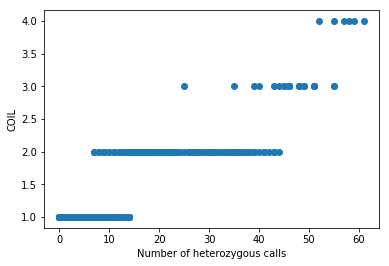

In [29]:
plt.scatter(Ns[valids], grc['COIL'][valids].astype(float))
plt.xlabel('Number of heterozygous calls')
plt.ylabel('COIL')